# Debate dos presidenci√°veis na Globo - 1¬∫ Turno - 2018

O debate ocorreu das 22h00 at√© por volta de 0h40 do dia 04 de Outubro de 2018 com a presen√ßa dos seguintes presidenci√°veis:
- Alvaro Dias (Podemos)
- Ciro Gomes (PDT)
- Fernando Haddad (PT)
- Geraldo Alckmin (PSDB)
- Guilherme Boulos (PSOL)
- Henrique Meirelles (MDB)
- Marina Silva (Rede)

O candidato Jair Bolsonaro (PSL) foi convidado, mas n√£o compareceu ao debate por recomenda√ß√µes m√©dicas, entretanto no mesmo hor√°rio do debate na Rede Globo o candidato deu uma entrevista na Rede Record, portanto seu nome foi considerado nesta pesquisa.
***

[√Ålvaro Dias](#alvaro)

Importa√ß√£o das bibliotecas necess√°rias e algumas configura√ß√µes:

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import spacy

pd.set_option('display.max_rows', 200_000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 2_500)

nlp = spacy.load('pt')
nlp.max_length = 3_000_000

import warnings
warnings.filterwarnings('ignore')

D:\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
D:\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192, got 176
  return f(*args, **kwds)
D:\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
D:\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192, got 176
  return f(*args, **kwds)


### Dados inten√ß√£o de votos aos presidenci√°veis
***

Antes de come√ßar as an√°lises com os tweets, vamos dar uma olhada nos dados do Datafolha sobre os presidenci√°veis at√© ent√£o. Fonte: https://www.poder360.com.br/banco-de-dados/

In [5]:
datafolha_est = pd.read_csv('datafolha_est.csv')
datafolha_rej = pd.read_csv('datafolha_rej.csv')

datafolha_est['data_pesquisa'] = datafolha_est['data_pesquisa'].apply(lambda x: pd.Timestamp(x).date())
datafolha_rej['data_pesquisa'] = datafolha_rej['data_pesquisa'].apply(lambda x: pd.Timestamp(x).date())

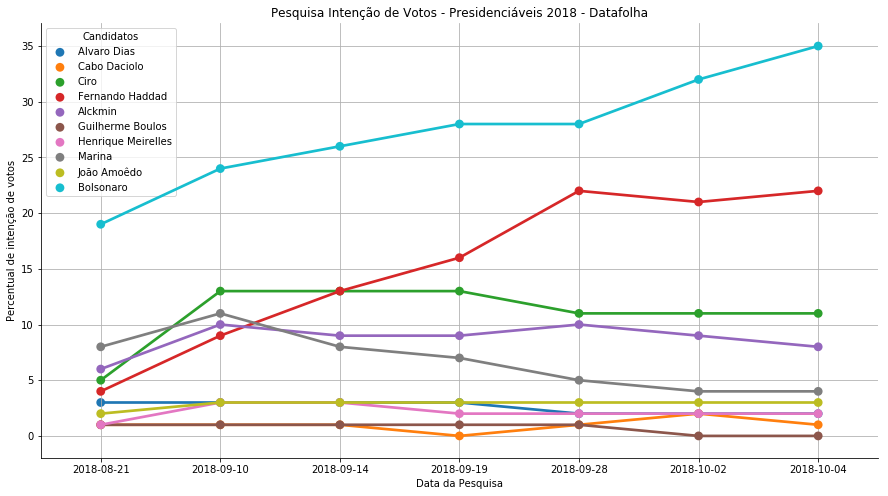

In [6]:
fig, ax = plt.subplots(figsize=(15, 8))

_ = sns.pointplot(x='data_pesquisa',
                  y='percentual',
                  hue='candidato',
                  data=datafolha_est,
                  hue_order=['Alvaro Dias', 'Cabo Daciolo', 'Ciro', 'Fernando Haddad', 'Alckmin', 'Guilherme Boulos',
                             'Henrique Meirelles', 'Marina', 'Jo√£o Amo√™do', 'Bolsonaro'],
                  ax=ax)

_ = ax.set(title='Pesquisa Inten√ß√£o de Votos - Presidenci√°veis 2018 - Datafolha',
           xlabel='Data da Pesquisa',
           ylabel='Percentual de inten√ß√£o de votos')

_ = sns.despine()
_ = ax.grid(True)
_ = ax.legend(title='Candidatos')

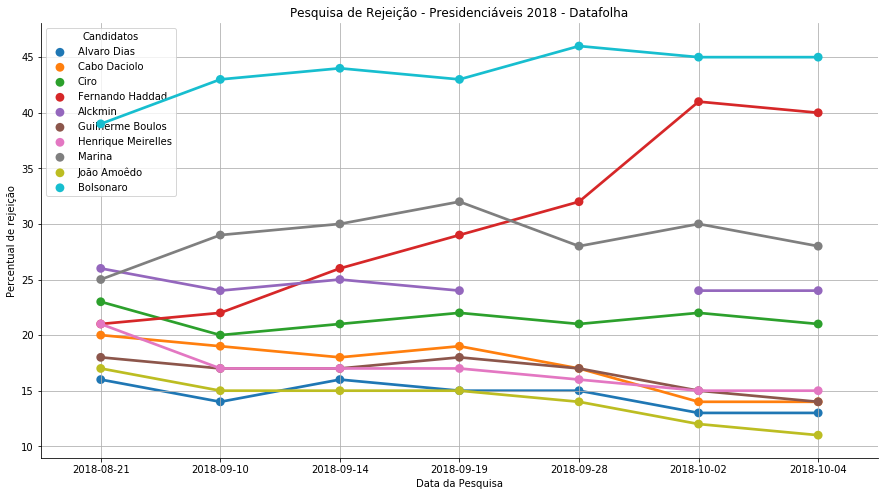

In [7]:
fig, ax = plt.subplots(figsize=(15, 8))

_ = sns.pointplot(x='data_pesquisa',
                  y='percentual',
                  hue='candidato',
                  data=datafolha_rej,
                  hue_order=['Alvaro Dias', 'Cabo Daciolo', 'Ciro', 'Fernando Haddad', 'Alckmin', 'Guilherme Boulos',
                             'Henrique Meirelles', 'Marina', 'Jo√£o Amo√™do', 'Bolsonaro'],
                  ax=ax)

_ = ax.set(title='Pesquisa de Rejei√ß√£o - Presidenci√°veis 2018 - Datafolha',
           xlabel='Data da Pesquisa',
           ylabel='Percentual de rejei√ß√£o')

_ = sns.despine()
_ = ax.grid(True)
_ = ax.legend(title='Candidatos')

## Dados twitter durante o debate
***

In [8]:
# Leitura do dataset
tweets = pd.read_csv('../tweets_debate_globo_limpo.csv')

# Convers√£o da coluna 'datetime' em objeto datetime
tweets['datetime'] = tweets['datetime'].apply(pd.Timestamp)

# Adi√ß√£o de mais duas colunas ao dataset:'hour' e 'minute'
tweets['hour'] = tweets['datetime'].apply(lambda x: x.hour)
tweets['minute'] = tweets['datetime'].apply(lambda x: x.minute)

tweets.head()

text  \
0                                                                                                                                                                                                        Boulos disse o essencial, que ninguem est√° dizendo: a democracia est√° em perigo. Isso √© s√©rio pra caralho.   
1                                                                                                                                                                                                                                                                               Debate nada, vou √© assistir Netflix   
2                                                                                                                                                                                                                                                    Boulos: A\r\nEu: CONTE COMIGO PRA TUDO (nas pr√≥ximas elei√ß√µes)   
3                                                                                                                                                                                                                                          O microfone do Meirelles caiu agora.\r\n\r\nO ponto, j√° faz uns 30 anos.   
4  PROPOSTAS DE BOLSONARO\r\n- Fim do 13¬∫ e f√©rias\r\n- Redu√ß√£o da licen√ßa maternidade\r\n- IR igual pra ricos e POBRES\r\n- Volta da CPMF\r\n- Fim do Bolsa Fam√≠lia e projetos sociais\r\n- Entrega da Petrobr√°s,BB e Caixa para americanos\r\n- Mais armas em circula√ß√£o\r\n- Teto de gastos com sa√∫de e educa√ß√£o   

                    datetime  \
0  2018-10-04 22:42:25+00:00   
1  2018-10-04 23:17:46+00:00   
2  2018-10-04 23:19:00+00:00   
3  2018-10-04 22:27:35+00:00   
4  2018-10-04 22:31:34+00:00   

                                                                                                                                                                                                                  text_clean  
0                                                                                                                                                          boulos o essencial ninguem o democracia perigar s√©rio pra caralho  
1                                                                                                                                                                                              debater nado assistir netflix  
2                                                                                                                                                                                       boulos o contar comigo pra o elei√ß√£o  
3                                                                                                                                                                                     o microfone meirelles cair o pontar 30  
4  proposto bolsonaro 13¬∫ e f√©ria redu√ß√£o licen√ßa maternidade igual pra rico e pobre voltar cpmf bolsar fam√≠lia e projetos social entregar petrobr√°s b e caixa parir americano armar circula√ß√£o teto gasto saudar e educa√ß√£o

In [12]:
# Dimens√£o do dataset
tweets.shape

(508503, 5)

In [3]:
# Cria√ß√£o de vari√°veis que ser√£o utilizadas no decorrer das an√°lises
candidatos = ['alvaro', 'ciro', 'haddad', 'alckmin', 'boulos', 'meirelles', 'marina', 'bolsonaro']
display_candidatos = ['√Ålvaro Dias', 'Ciro Gomes', 'Fernando Haddad', 'Geraldo Alckmin', 'Guilherme Boulos', 'Henrique Meirelles', 'Marina Silva', 'Jair Bolsonaro']
colors = ['blue', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'c']
map_names = {k: v for k, v in zip(candidatos, display_candidatos)}

In [4]:
# Fun√ß√µes que ser√£o utilizads nas an√°lises
import re
from collections import Counter

def mask_palavra_texto(palavra, texto):
    padr√£o = r'(^|[^\w]){}([^\w]|$)'.format(palavra)
    padr√£o = re.compile(padr√£o, re.IGNORECASE)
    matches = re.search(padr√£o, texto)
    return bool(matches)

def plot_contagem_candidatos(df, lista_candidatos):
    contagem = []
    palette = {k: v for k, v in zip(display_candidatos, colors)}    
    for candidato in lista_candidatos:
        contagem.append(df['text'].astype(str).apply(lambda x: mask_palavra_texto(candidato, x.lower())).sum())

    plot_df = pd.DataFrame({'Candidatos': candidatos, 'Contagem': contagem}).sort_values(by='Contagem', ascending=False)
    plot_df['Candidatos'] = plot_df['Candidatos'].map(map_names)
    fig, ax = plt.subplots(figsize=(15, 8))
    _ = sns.barplot(x='Candidatos', y='Contagem', data=plot_df, ax=ax, palette=palette)
    _ = ax.set(title='Contagem de tweets em que cada candidato foi citado')
    _ = sns.despine()

def verbos_candidatos(texto, candidato, qtde=5):
    sents = [sent for sent in texto.sents if candidato in sent.string.lower()]
    char_words = []
    for sent in sents: 
        for word in sent: 
            if candidato in word.string: 
                char_words.append(word)
    char_verbs = []
    for word in char_words: 
        for ancestor in word.ancestors: 
            if ancestor.pos_.startswith('V'): 
                char_verbs.append(ancestor.lemma_.strip())
    return Counter(char_verbs).most_common(qtde)

def adjetivos_candidatos(texto, candidato, qtde=5):
    sents = [sent for sent in texto.sents if candidato in sent.string.lower()]
    char_adjs = []
    for sent in sents: 
        for word in sent: 
            for child in word.children: 
                if child.pos_ == 'ADJ':
                    char_adjs.append(child)
    return Counter(char_adjs).most_common(qtde)
                    
def frases_candidato(df, candidato, palavra, qtde=5):
    mask_cand = df['text_clean'].astype(str).apply(lambda x: mask_palavra_texto(candidato, x))
    mask_palavra = df['text_clean'].astype(str).apply(lambda x: mask_palavra_texto(palavra, x))
    return list(df[mask_cand & mask_palavra]['text'].head(qtde))

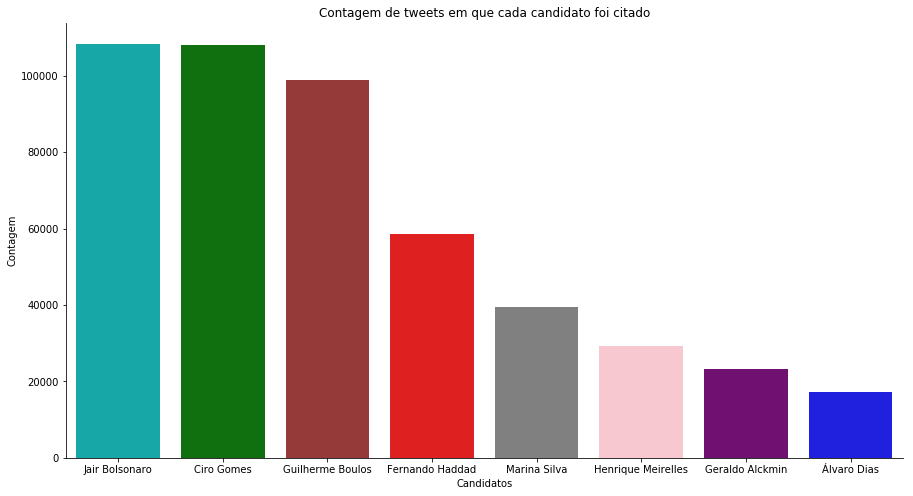

In [93]:
plot_contagem_candidatos(tweets, candidatos)

Distribui√ß√£o dos tweets por candidato durante o debate:

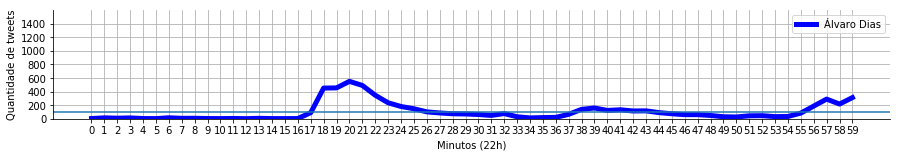

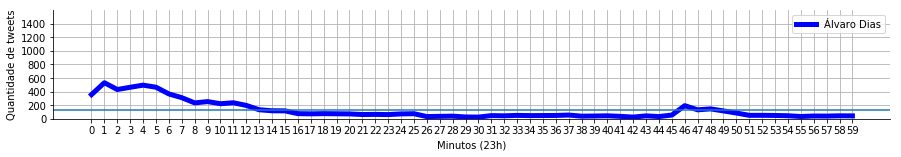

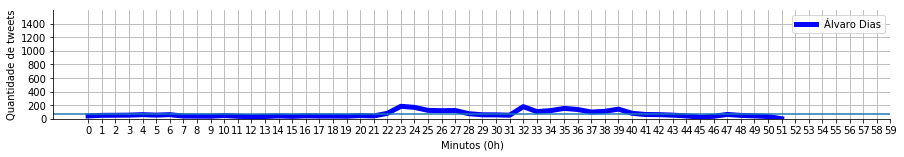

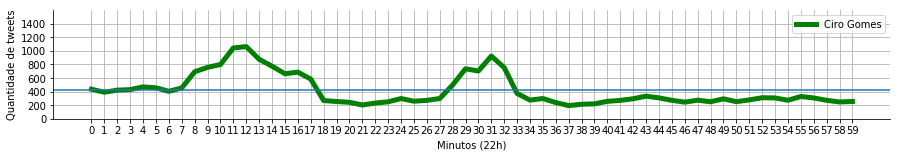

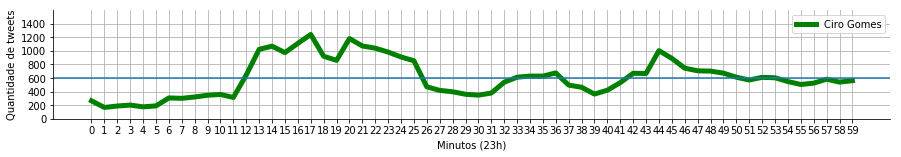

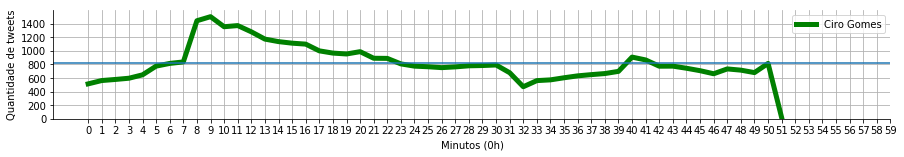

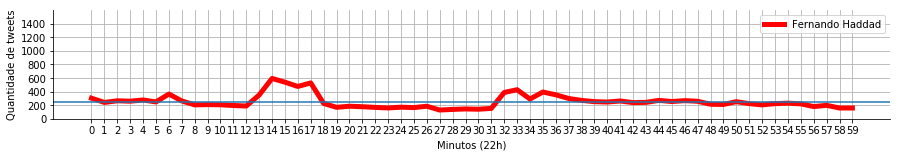

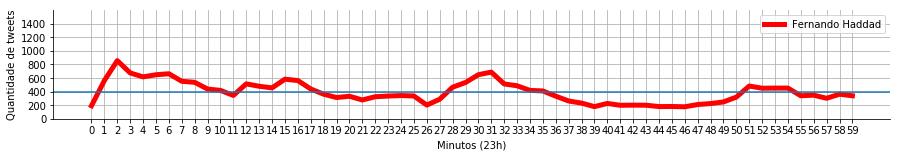

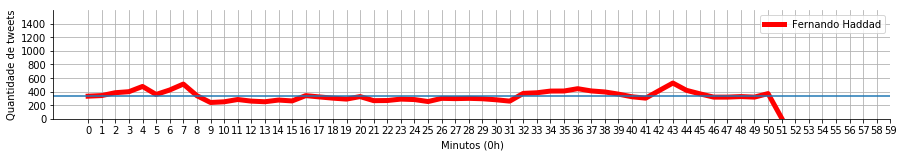

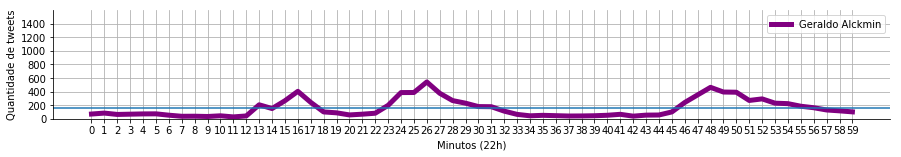

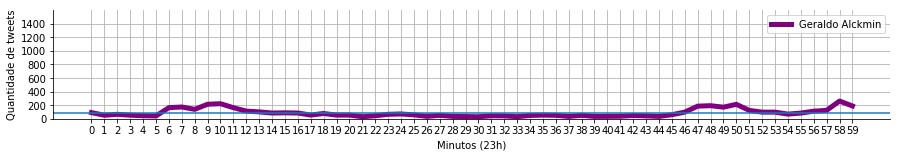

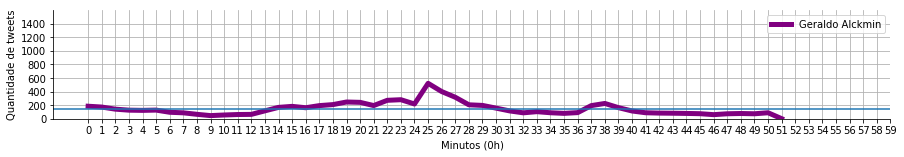

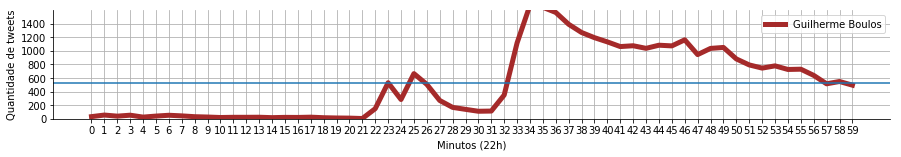

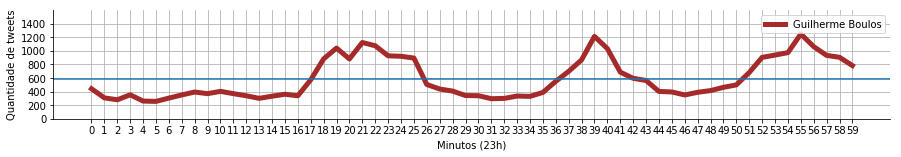

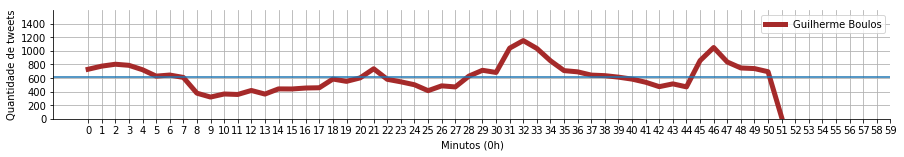

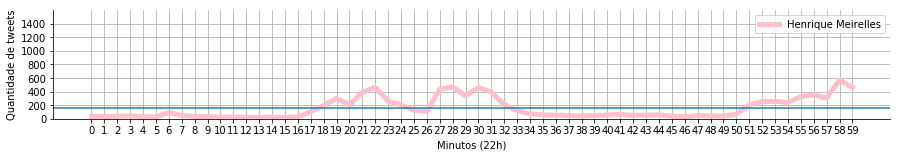

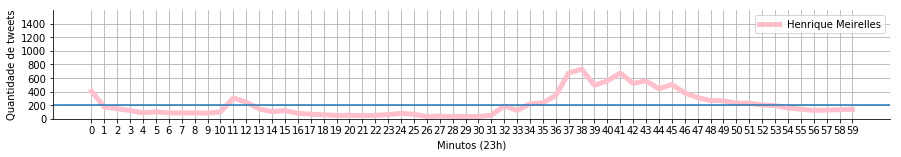

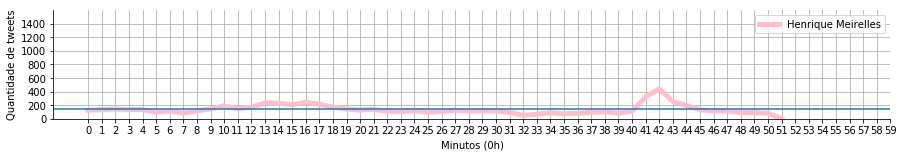

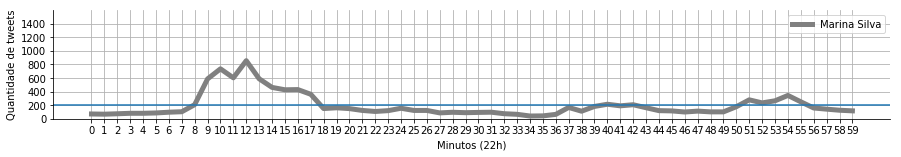

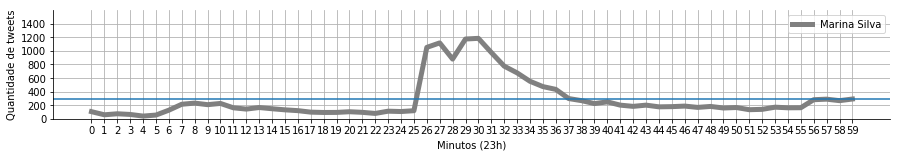

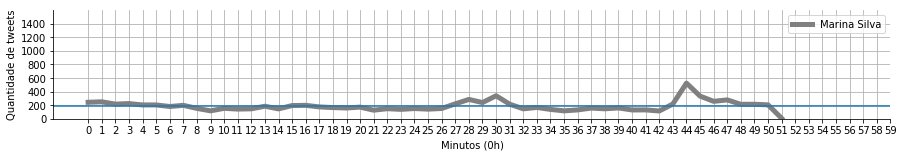

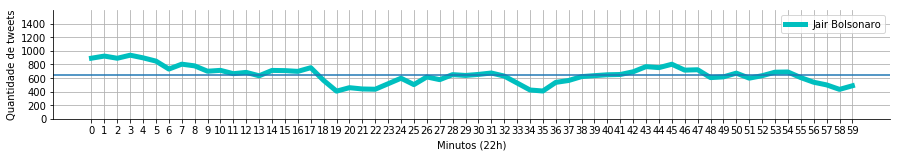

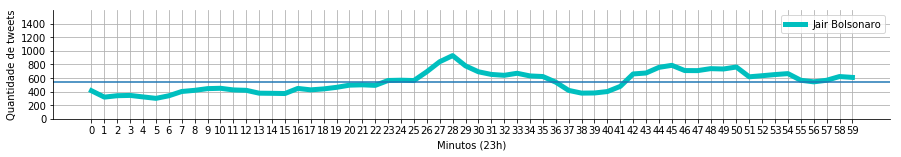

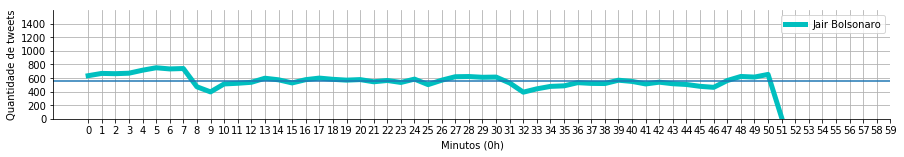

In [89]:
for candidato, c, nome in zip(candidatos, colors, display_candidatos):
    df_cand = tweets[tweets['text'].apply(lambda x: mask_palavra_texto(candidato, x))]
    for hora in [22, 23, 0]:
        fig, ax = plt.subplots(figsize=(15, 2))
        to_plot = df_cand[df_cand['hour']==hora]['minute'].value_counts().sort_index().reset_index()
        _ = sns.lineplot(x='index', y='minute', data=to_plot, ax=ax, color=c, label=nome, linewidth=5)

        _ = ax.set(xlabel='Minutos ({0}h)'.format(hora),
                   ylabel='Quantidade de tweets',
                   xticks=list(range(0, 60, 1)),
                   yticks=list(range(0, 1_500, 200)),
                   ylim=[0, 1_600])

        _ = ax.legend()
        _ = ax.grid(True)
        _ = ax.axhline(to_plot['minute'].mean())

        _ = sns.despine()
    _ = plt.subplots_adjust(hspace=0.4)

## An√°lise de Sentimentos
***

In [5]:
# Datasets train e holdout anteriormente tratados (notebook Preprocessing)
train = pd.read_csv('../tweets_train.csv')
holdout = pd.read_csv('../tweets_holdout.csv')

In [6]:
train.head()

text  \
0                                                                                                                                                                                                                        Boulos disse o essencial, que ninguem est√° dizendo: a democracia est√° em perigo. Isso √© s√©rio pra caralho.   
1                                                                                                                                                                                                                                                                                               Debate nada, vou √© assistir Netflix   
2                                                                                                                                                                                                                                                                  Boulos: A\r\r\nEu: CONTE COMIGO PRA TUDO (nas pr√≥ximas elei√ß√µes)   
3                                                                                                                                                                                                                                                      O microfone do Meirelles caiu agora.\r\r\n\r\r\nO ponto, j√° faz uns 30 anos.   
4  PROPOSTAS DE BOLSONARO\r\r\n- Fim do 13¬∫ e f√©rias\r\r\n- Redu√ß√£o da licen√ßa maternidade\r\r\n- IR igual pra ricos e POBRES\r\r\n- Volta da CPMF\r\r\n- Fim do Bolsa Fam√≠lia e projetos sociais\r\r\n- Entrega da Petrobr√°s,BB e Caixa para americanos\r\r\n- Mais armas em circula√ß√£o\r\r\n- Teto de gastos com sa√∫de e educa√ß√£o   

                    datetime  \
0  2018-10-04 22:42:25+00:00   
1  2018-10-04 23:17:46+00:00   
2  2018-10-04 23:19:00+00:00   
3  2018-10-04 22:27:35+00:00   
4  2018-10-04 22:31:34+00:00   

                                                                                                                                                                                                                  text_clean  \
0                                                                                                                                                          boulos o essencial ninguem o democracia perigar s√©rio pra caralho   
1                                                                                                                                                                                              debater nado assistir netflix   
2                                                                                                                                                                                       boulos o contar comigo pra o elei√ß√£o   
3                                                                                                                                                                                     o microfone meirelles cair o pontar 30   
4  proposto bolsonaro 13¬∫ e f√©ria redu√ß√£o licen√ßa maternidade igual pra rico e pobre voltar cpmf bolsar fam√≠lia e projetos social entregar petrobr√°s b e caixa parir americano armar circula√ß√£o teto gasto saudar e educa√ß√£o   

   sentiment  
0        0.0  
1       -1.0  
2        1.0  
3       -1.0  
4       -1.0

In [7]:
holdout.head()

text  \
0                                                                                   √°lvaro dias perguntando pro meirelzzZZZzzzzZZzzZZZzz   
1  Ningu√©m falou sobre isso at√© agora no debate. Acabar com desmatamento t√£o importante quanto reduzir emiss√µes. https://t.co/2MFFikdbFW   
2                                                      Fernando Haddad destruiu o Alvaro Dias. N√£o que isso seja dif√≠cil. #DebateNaGlobo   
3            a fala hist√≥rica do boulos contra a ditadura. pra rever e se emocionar de novo #DebateNaGlobo \r\r\nhttps://t.co/jsJRjjhKIi   
4                                                                           o cu do bozo encontra-se arrombado depois dessa fala do ciro   

                    datetime  \
0  2018-10-04 22:18:06+00:00   
1  2018-10-04 23:12:08+00:00   
2  2018-10-04 23:53:50+00:00   
3  2018-10-05 00:17:54+00:00   
4  2018-10-05 00:10:30+00:00   

                                                                              text_clean  
0                                          √°lvaro perguntar pro meirelzzzzzzzzzzzzzzzzzz  
1  ningu√©m falar sobrar o debater acabar desmatamento importante quantum reduzir emiss√£o  
2                                fernando haddad destruir o alvaro dif√≠cil debatenaglobo  
3                o falir hist√≥rico boulos o ditadura pra rever e emocionar debatenaglobo  
4                                              o cu bozo encontrar arrombar d falir ciro

In [8]:
train.shape

(1000, 4)

- Pr√©-processamento dos datasets:

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [10]:
n_train = train.shape[0]
full = pd.concat([train, holdout], ignore_index=True, sort=False)
full = full['text_clean'].copy()

In [11]:
full.shape

(508118,)

In [12]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(full)

In [13]:
tfidf = TfidfTransformer()
X = tfidf.fit_transform(X)

In [14]:
train_tfidf = X[:n_train, :]
holdout_tfidf = X[n_train:, :]
y = train['sentiment']

- Random Forest Classifier:

In [15]:
from sklearn.model_selection import cross_val_score

In [16]:
from sklearn.ensemble import RandomForestClassifier

D:\Anaconda\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [17]:
rf = RandomForestClassifier(n_jobs=-1, n_estimators=50).fit(train_tfidf, y)

In [18]:
cross_val_score(rf, train_tfidf, y, cv=10, scoring='accuracy').mean()

0.5690689987366084

In [19]:
preds = rf.predict(holdout_tfidf)

In [20]:
holdout['sentiment'] = preds

In [21]:
full_tweets = pd.concat([train, holdout], ignore_index=True)

In [22]:
# Convers√£o da coluna 'datetime' em objeto datetime
full_tweets['datetime'] = full_tweets['datetime'].apply(pd.Timestamp)

# Adi√ß√£o de mais duas colunas ao dataset:'hour' e 'minute'
full_tweets['hour'] = full_tweets['datetime'].apply(lambda x: x.hour)
full_tweets['minute'] = full_tweets['datetime'].apply(lambda x: x.minute)

full_tweets.head()

text  \
0                                                                                                                                                                                                                        Boulos disse o essencial, que ninguem est√° dizendo: a democracia est√° em perigo. Isso √© s√©rio pra caralho.   
1                                                                                                                                                                                                                                                                                               Debate nada, vou √© assistir Netflix   
2                                                                                                                                                                                                                                                                  Boulos: A\r\r\nEu: CONTE COMIGO PRA TUDO (nas pr√≥ximas elei√ß√µes)   
3                                                                                                                                                                                                                                                      O microfone do Meirelles caiu agora.\r\r\n\r\r\nO ponto, j√° faz uns 30 anos.   
4  PROPOSTAS DE BOLSONARO\r\r\n- Fim do 13¬∫ e f√©rias\r\r\n- Redu√ß√£o da licen√ßa maternidade\r\r\n- IR igual pra ricos e POBRES\r\r\n- Volta da CPMF\r\r\n- Fim do Bolsa Fam√≠lia e projetos sociais\r\r\n- Entrega da Petrobr√°s,BB e Caixa para americanos\r\r\n- Mais armas em circula√ß√£o\r\r\n- Teto de gastos com sa√∫de e educa√ß√£o   

                   datetime  \
0 2018-10-04 22:42:25+00:00   
1 2018-10-04 23:17:46+00:00   
2 2018-10-04 23:19:00+00:00   
3 2018-10-04 22:27:35+00:00   
4 2018-10-04 22:31:34+00:00   

                                                                                                                                                                                                                  text_clean  \
0                                                                                                                                                          boulos o essencial ninguem o democracia perigar s√©rio pra caralho   
1                                                                                                                                                                                              debater nado assistir netflix   
2                                                                                                                                                                                       boulos o contar comigo pra o elei√ß√£o   
3                                                                                                                                                                                     o microfone meirelles cair o pontar 30   
4  proposto bolsonaro 13¬∫ e f√©ria redu√ß√£o licen√ßa maternidade igual pra rico e pobre voltar cpmf bolsar fam√≠lia e projetos social entregar petrobr√°s b e caixa parir americano armar circula√ß√£o teto gasto saudar e educa√ß√£o   

   sentiment  hour  minute  
0        0.0    22      42  
1       -1.0    23      17  
2        1.0    23      19  
3       -1.0    22      27  
4       -1.0    22      31

Cria√ß√£o de mais uma coluna para cada candidato onde assumir√£o os seguintes valores:
- -5, se o candidato n√£o foi citado no tweet;
- -1, se o candidato foi citado no tweet e o tweet apresenta sentimento negativo;
- 0, se o candidato foi citado no tweet e o tweet apresenta sentimento neutro;
- 1, se o candidato foi citado no tweet e o tweet apresenta sentimento positivo.

In [23]:
for candidato in candidatos:
    candidato_sentiments = []
    
    for idx, row in enumerate(full_tweets['text']):
        if candidato in row.lower():
            candidato_sentiments.append(full_tweets.loc[idx, 'sentiment'])
        else:
            candidato_sentiments.append(-5)
            
    full_tweets[candidato] = candidato_sentiments

In [24]:
full_tweets.head()

text  \
0                                                                                                                                                                                                                        Boulos disse o essencial, que ninguem est√° dizendo: a democracia est√° em perigo. Isso √© s√©rio pra caralho.   
1                                                                                                                                                                                                                                                                                               Debate nada, vou √© assistir Netflix   
2                                                                                                                                                                                                                                                                  Boulos: A\r\r\nEu: CONTE COMIGO PRA TUDO (nas pr√≥ximas elei√ß√µes)   
3                                                                                                                                                                                                                                                      O microfone do Meirelles caiu agora.\r\r\n\r\r\nO ponto, j√° faz uns 30 anos.   
4  PROPOSTAS DE BOLSONARO\r\r\n- Fim do 13¬∫ e f√©rias\r\r\n- Redu√ß√£o da licen√ßa maternidade\r\r\n- IR igual pra ricos e POBRES\r\r\n- Volta da CPMF\r\r\n- Fim do Bolsa Fam√≠lia e projetos sociais\r\r\n- Entrega da Petrobr√°s,BB e Caixa para americanos\r\r\n- Mais armas em circula√ß√£o\r\r\n- Teto de gastos com sa√∫de e educa√ß√£o   

                   datetime  \
0 2018-10-04 22:42:25+00:00   
1 2018-10-04 23:17:46+00:00   
2 2018-10-04 23:19:00+00:00   
3 2018-10-04 22:27:35+00:00   
4 2018-10-04 22:31:34+00:00   

                                                                                                                                                                                                                  text_clean  \
0                                                                                                                                                          boulos o essencial ninguem o democracia perigar s√©rio pra caralho   
1                                                                                                                                                                                              debater nado assistir netflix   
2                                                                                                                                                                                       boulos o contar comigo pra o elei√ß√£o   
3                                                                                                                                                                                     o microfone meirelles cair o pontar 30   
4  proposto bolsonaro 13¬∫ e f√©ria redu√ß√£o licen√ßa maternidade igual pra rico e pobre voltar cpmf bolsar fam√≠lia e projetos social entregar petrobr√°s b e caixa parir americano armar circula√ß√£o teto gasto saudar e educa√ß√£o   

   sentiment  hour  minute  alvaro  ciro  haddad  alckmin  boulos  meirelles  \
0        0.0    22      42    -5.0  -5.0    -5.0     -5.0     0.0       -5.0   
1       -1.0    23      17    -5.0  -5.0    -5.0     -5.0    -5.0       -5.0   
2        1.0    23      19    -5.0  -5.0    -5.0     -5.0     1.0       -5.0   
3       -1.0    22      27    -5.0  -5.0    -5.0     -5.0    -5.0       -1.0   
4       -1.0    22      31    -5.0  -5.0    -5.0     -5.0    -5.0       -5.0   

   marina  bolsonaro  
0    -5.0       -5.0  
1    -5.0       -5.0  
2    -5.0       -5.0  
3    -5.0       -5.0  
4    -5.0       -1.0

In [25]:
full_tweets.iloc[:, 4:].head()

hour  minute  alvaro  ciro  haddad  alckmin  boulos  meirelles  marina  \
0    22      42    -5.0  -5.0    -5.0     -5.0     0.0       -5.0    -5.0   
1    23      17    -5.0  -5.0    -5.0     -5.0    -5.0       -5.0    -5.0   
2    23      19    -5.0  -5.0    -5.0     -5.0     1.0       -5.0    -5.0   
3    22      27    -5.0  -5.0    -5.0     -5.0    -5.0       -1.0    -5.0   
4    22      31    -5.0  -5.0    -5.0     -5.0    -5.0       -5.0    -5.0   

   bolsonaro  
0       -5.0  
1       -5.0  
2       -5.0  
3       -5.0  
4       -1.0

- Cria√ß√£o de um novo dataframe com a contagem dos sentimentos de cada tweet relacionado ao candidato mencionado:<br>

In [26]:
qtde_tweets = {}
for candidato in candidatos:
    positivos = len(full_tweets[full_tweets[candidato]==1][candidato])
    neutros = len(full_tweets[full_tweets[candidato]==0][candidato])
    negativos = len(full_tweets[full_tweets[candidato]==-1][candidato])
    
    qtde_tweets[candidato] = [positivos, neutros, negativos]

In [27]:
qtde_tweets_df = pd.DataFrame(qtde_tweets, index=['positivos', 'neutros', 'negativos']).T

qtde_tweets_df['total'] = qtde_tweets_df.sum(axis=1)
qtde_tweets_df = qtde_tweets_df.sort_values(by='total', ascending=False)
qtde_tweets_df

positivos  neutros  negativos   total
ciro           62309    18374      38933  119616
bolsonaro      18928    22656      75550  117134
boulos         77490     9332      16783  103605
haddad         25036    17521      34314   76871
marina         16422     7181      17579   41182
meirelles       4439     3258      21590   29287
alckmin         2088     6813      14789   23690
alvaro          2323     3506      12743   18572

- Gr√°fico de an√°lise de sentimento em rela√ß√£o a cada candidato mencionado:<br>
    <sub>* A an√°lise leva em considera√ß√£o o sentimento em que a pessoa demonstrou ao escrever o tweet, pode n√£o apresentar uma correla√ß√£o com o sentimento em rela√ß√£o ao candidato.</sub>

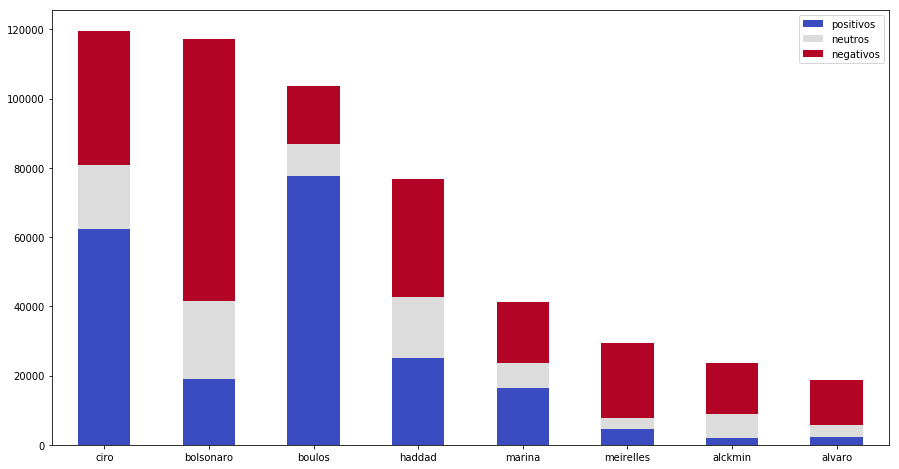

In [28]:
qtde_tweets_df.drop('total', axis=1).plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(15,8), rot=0);

In [75]:
import matplotlib.transforms as mtransforms

def plot_distribuicao_sentimento(df, candidato, factor):
    nome = display_candidatos[candidatos.index(candidato)]
    c = colors[candidatos.index(candidato)]
    df_cand = df[df['text'].apply(lambda x: mask_palavra_texto(candidato, x))]
    for hora in [22, 23, 0]:
        fig, ax = plt.subplots(figsize=(15, 2))
        to_plot = df_cand[df_cand['hour']==hora]['minute'].value_counts().sort_index().reset_index()
        _ = sns.lineplot(x='index', y='minute', data=to_plot, ax=ax, color=c, label=nome, linewidth=5)

        df_pos = df_cand[(df_cand['hour']==hora) & (df_cand[candidato]==1)]['minute'].value_counts().sort_index().reset_index()
        _ = sns.lineplot(x='index', y='minute', data=df_pos, ax=ax, color='blue', label='Positivo', linewidth=2)

        df_neg = df_cand[(df_cand['hour']==hora) & (df_cand[candidato]==-1)]['minute'].value_counts().sort_index().reset_index()
        _ = sns.lineplot(x='index', y='minute', data=df_neg, ax=ax, color='red', label='Negativo', linewidth=2)

        _ = ax.set(xlabel='Minutos ({0}h)'.format(hora),
                   ylabel='Quantidade de tweets',
                   xticks=list(range(0, 60, 1)),
                   yticks=list(range(0, 1_500, 200)),
                   ylim=[0, 1_600])

        _ = ax.legend()
        _ = ax.grid(True)
        _ = ax.axhline(to_plot['minute'].mean())
        
        x=to_plot['index']
        y=to_plot['minute']
        trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
        theta = (to_plot['minute'].mean())*factor
        _ = ax.axhline(-theta, color='red', lw=2, alpha=0.5)
        _ = ax.fill_between(x, 0, 1, where=y > theta, facecolor='red', alpha=0.2, transform=trans)

        _ = sns.despine()
    _ = plt.subplots_adjust(hspace=0.4)
    
    
def analise_nlp(df_tweets, candidato, hora, minutos_comeco, minutos_fim):
    df_cand = df_tweets[df_tweets['text'].apply(lambda x: mask_palavra_texto(candidato, x))]
    df = df_cand[(df_cand['hour']==hora) & ((df_cand['minute']>=minutos_comeco) & (df_cand['minute']<=minutos_fim))].copy()
    df_spacy = nlp(str(df['text']))
    nome = display_candidatos[candidatos.index(candidato)]
    verbos = verbos_candidatos(df_spacy, candidato)
    adjetivos = adjetivos_candidatos(df_spacy, candidato)
    print(' Hor√°rio:  {0}h{1} as {0}h{2}'.format(hora, minutos_comeco, minutos_fim))
    print(' Presidenci√°vel:  {0}'.format(nome))
    print(' Quantidade de tweets:  {0}'.format(df.shape[0]))
    print(' Verbos mais utilizados:  {0}'.format(verbos))
    print(' Adjetivos mais utilizados:  {0}'.format(adjetivos))
    print('\n')
    if candidato == 'marina':
        candidato = 'marino'
    for verbo in verbos:
        tweets = frases_candidato(df, candidato, verbo[0])
        flag = 0
        if (len(tweets) != 0) and (flag < 3):
            print(' Alguns tweets com o verbo "{0}":'.format(verbo[0]))
            for tweet in tweets:
                print('')
                print(u'\U0001f4ac   {0}'.format(tweet))
            print('\n')
            flag+=1

### √Ålvaro Dias <a id='alvaro'></a>

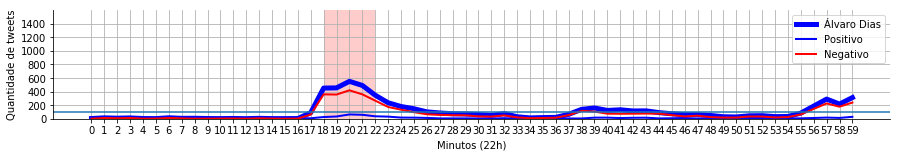

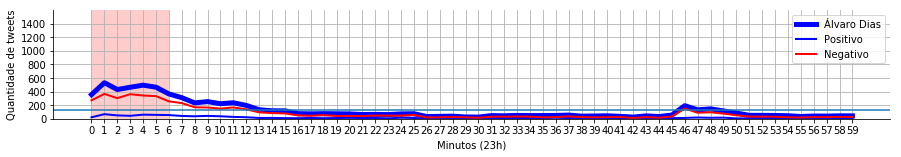

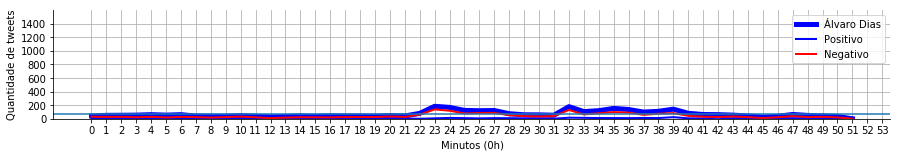

In [52]:
plot_distribuicao_sentimento(full_tweets, 'alvaro', 2.6)

In [56]:
analise_nlp(full_tweets, 'alvaro', 22, 18, 22)

 Hor√°rio:  22h18 as 22h22
 Presidenci√°vel:  √Ålvaro Dias
 Quantidade de tweets:  2296
 Verbos mais utilizados:  [('ficar', 76), ('querer', 45), ('ter', 26), ('beber', 23), ('fazer', 22)]
 Adjetivos mais utilizados:  [(capital, 1), (feliz, 1), (belo, 1), (b√™bado, 1), (igual, 1)]


 Alguns tweets com o verbo "ficar":

üí¨   Beber at√© ficar doido que nem o Alvaro Dias

üí¨   Quero beber no fds ate ficar igual o Alvaro dias

üí¨   O ALVARO DIAS ficou elogiando o William Bonner e esqueceu de perguntar e o tempo acabou KKKKKKKKKKKKKKKKKKKKKKKK

pqp mano olha o nivel dos candidatos

#DebateGlobo https://t.co/Mipb5ava0Q

üí¨   Quero beber no fds ate ficar igual o Alvaro dias

üí¨   alvaro dias passou 2hrs babando o ovo do william bonner que ficou sem tempo pra fazer pergunta, grito


 Alguns tweets com o verbo "querer":

üí¨   Quero beber no fds ate ficar igual o Alvaro dias

üí¨   Quero beber no fds ate ficar igual o Alvaro dias

üí¨   Quero beber no fds ate ficar igual o Alvaro d

Esta rea√ß√£o no twitter reflete o momento em que o candidato √Ålvaro Dias extrapolou o tempo para realizar uma pergunta e foi interrompido pelo apresentador William Bonner.

In [57]:
analise_nlp(full_tweets, 'alvaro', 23, 0, 6)

 Hor√°rio:  23h0 as 23h6
 Presidenci√°vel:  √Ålvaro Dias
 Quantidade de tweets:  3108
 Verbos mais utilizados:  [('tomar', 99), ('alguem', 75), ('parecer', 68), ('ter', 63), ('dar', 61)]
 Adjetivos mais utilizados:  [(devido, 1), (u√≠sque, 1), (maior, 1), (s√©rio, 1), (monstruoso, 1)]


 Alguns tweets com o verbo "tomar":

üí¨   cala a boca alvaro dias vai tomar no cu

üí¨   O ALVARO DIAS T√Å MAIS LOCO QUE O ROBOCOP TOMANDO BANHO DE MANGUEIRA

üí¨   A FELICIDADE DO ALVARO DIAS TOMANDO ESPORRO DO BONNER

üí¨   alvaro dias tomando varios esporros LKKKKKKKKKK #DebateNaGlobo

üí¨   alguem descobre oq foi q alvaro dias tomou antes do debate pq eu quero um pouco 

#DebateNaGlobo


 Alguns tweets com o verbo "alguem":

üí¨   alguem descobre oq foi q alvaro dias tomou antes do debate pq eu quero um pouco 

#DebateNaGlobo

üí¨   alguem descobre oq foi q alvaro dias tomou antes do debate pq eu quero um pouco 

#DebateNaGlobo

üí¨   Ai gente alvaro, alguem acaba o tempo do alvaro ja

üí¨

Esta manifesta√ß√£o reflete ao momento em que o candidato √Ålvaro Dias recebe indica√ß√µes do apresentador William Bonner para se manter posicionado para a c√¢mera.

**Considera√ß√µes** <br>
Em geral n√£o foi observado coment√°rios em rela√ß√£o √†s propostas ou ideais do candidato, foram manifesta√ß√µes decorrentes de acontecimentos n√£o inerentes √† pol√≠tica em si.

### Ciro Gomes

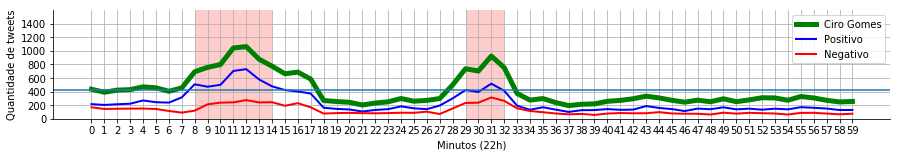

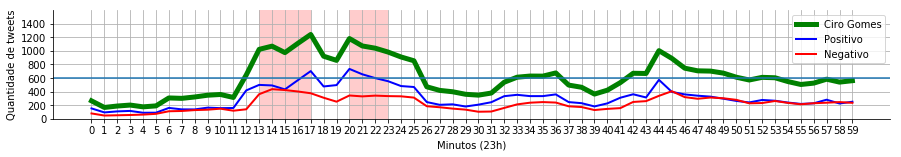

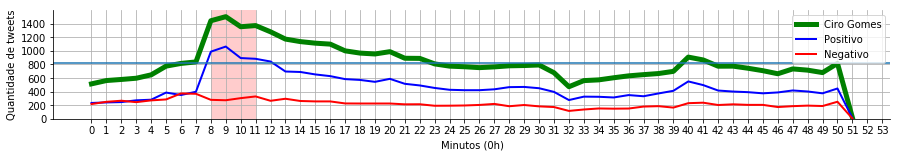

In [60]:
plot_distribuicao_sentimento(full_tweets, 'ciro', 1.6)

In [59]:
analise_nlp(full_tweets, 'ciro', 22, 10, 13)

 Hor√°rio:  22h10 as 22h13
 Presidenci√°vel:  Ciro Gomes
 Quantidade de tweets:  3780
 Verbos mais utilizados:  [('votar', 40), ('ter', 39), ('amar', 33), ('querer', 28), ('lindar', 19)]
 Adjetivos mais utilizados:  [(gomes, 1), (sensatas, 1), (primeira, 1), (marina, 1), (real, 1)]


 Alguns tweets com o verbo "votar":

üí¨   A primeira pergunta do Ciro j√° me fez sentir orgulho de votar nele

#DebateGlobo https://t.co/j9innHcixY

üí¨   Ciro: Marina √© muito sensata pensa parecido comigo por√©m sou melhor votem em mim. 

#DebateNaGlobo

üí¨   N√£o vote contra o PT ‚ùó

N√£o vote contra Bolsonaro üö´

Vote a favor do Brasil üáßüá∑

Vote Ciro 1Ô∏è‚É£2Ô∏è‚É£
 #TsunamiCIRO https://t.co/nC0m7SuQeZ

üí¨   Bolsonaristas j√° comemoram prov√°vel vit√≥ria sobre Haddad!

Novamente, DataFolha mostra que Bolsonaro s√≥ perde para Ciro.

Bolsonaro 44% x 43% Haddad 
Ciro 48% x 42% Bolsonaro

Os √∫ltimos dias s√£o os mais decisivos!
Est√° nas suas m√£os!
Ainda da tempo!

Vote Ciro 12

 #TsunamiC

Esta primeira manifesta√ß√£o referente ao candidato Ciro Gomes no twitter se deu em favor ao seu discurso sobre a polariza√ß√£o da pol√≠tica vivida atualmente no pa√≠s, onde ele discursou contr√°rio a este cen√°rio.

In [61]:
analise_nlp(full_tweets, 'ciro', 22, 29, 32)

 Hor√°rio:  22h29 as 22h32
 Presidenci√°vel:  Ciro Gomes
 Quantidade de tweets:  3116
 Verbos mais utilizados:  [('votar', 50), ('falir', 32), ('falar', 31), ('querer', 29), ('ter', 29)]
 Adjetivos mais utilizados:  [(jovem, 1), (tonico, 1), (facial, 1), (ciro, 1), (√∫til, 1)]


 Alguns tweets com o verbo "votar":

üí¨   voto √∫til &amp; ciro gomes nao cabem na mesma frase

üí¨   @anabeat05826201 @c410x3 @LCanicali @LEONARDOS0UZA @costaantonios Isso seria triste. Meu voto no Ciro √© totalmente‚Ä¶ https://t.co/lS0xO7bJH6

üí¨   Meirelles quase declarando seu voto pro Ciro t√° lindo demais kkkkkkkkk

#DebateNaGlobo
#tsunamiCiro

üí¨   EU SINTO QUE CIRO √â O √öNICO QUE PODE NOS SALVAR VOTEM NO CIRO GENTE #DebateNaGlobo

üí¨   @cirogomes @r_myrella CIRO EU TE AMO! Eu estou muito triste pq n tirei meu t√≠tulo pra poder votar em vc!!!!


 Alguns tweets com o verbo "falir":

üí¨   HAHAHAHAHAHAHHAHA CIRO FALA ‚Äún√£o existe salvador da p√°tria‚Äù uma piada mesmo hahahahahahahahahahaha



Neste momento o candidato Henrique Meirelles questionou ao candidato Ciro Gomes sobre suas ideias quanto surgimento de um "salvador da p√°tria", o candidato Ciro Gomes discursou se refereindo novamente √† polariza√ß√£o da pol√≠tica e afirmando que "n√£o existe um salvador da p√°tria". A recep√ß√£o deste discursou ficou bem dividida entre apoiadores e cr√≠ticos no twitter.

In [62]:
analise_nlp(full_tweets, 'ciro', 23, 13, 17)

 Hor√°rio:  23h13 as 23h17
 Presidenci√°vel:  Ciro Gomes
 Quantidade de tweets:  5416
 Verbos mais utilizados:  [('votar', 80), ('falar', 67), ('passar', 65), ('abreu', 63), ('tava', 53)]
 Adjetivos mais utilizados:  [(dif√≠ceis, 1), (ciro, 1), (pr√≥ximo, 1), (pro, 1), (meio, 1)]


 Alguns tweets com o verbo "votar":

üí¨   Proximo  tema: pq votar no Ciro 12 #TsunamiCIRO https://t.co/XzWgBn1kec

üí¨   Boulos, eu vou votar no Ciro pensando em voc√™.

üí¨   O Ciro disse mesmo que a Katia Abreu √© A pessoa pra falar de meio ambiente?

Ele n√£o quer o voto de voc√™s, amigos. Olha s√≥...

#DebateNaGlobo

üí¨   minha v√≥ vai votar no ciro ain q orgulho da veinha

üí¨   VOTA CIRO PORRAAAAAaaaaaaaaa #CiroSim #Ciro12 #CiroNaGlobo #TsunamiCIRO


 Alguns tweets com o verbo "falar":

üí¨   ciro ta ate rindo de tanto q marina falou da br 163

üí¨   O Ciro disse mesmo que a Katia Abreu √© A pessoa pra falar de meio ambiente?

Ele n√£o quer o voto de voc√™s, amigos. Olha s√≥...

#DebateNaGlobo

O candidato Ciro Gomes respondeu uma pergunta do candidato Fernando Haddad com a tem√°tica de Agroneg√≥cio e Meio Ambiente afirmando que confia em sua vice para estes assuntos, esta afirma√ß√£o gerou uma manifesta√ß√£o no twitter devido √†s pol√™micas em que a sua vice, K√°tia Abreu, est√° envolvida, ela √© acusada de graves crimes ambientais sendo, inclusive, detentora de apelidos como "Miss Desmatamento" e "Rainha da Motosserra".

In [63]:
analise_nlp(full_tweets, 'ciro', 23, 20, 23)

 Hor√°rio:  23h20 as 23h23
 Presidenci√°vel:  Ciro Gomes
 Quantidade de tweets:  4274
 Verbos mais utilizados:  [('querer', 69), ('votar', 37), ('falar', 34), ('ter', 28), ('tava', 26)]
 Adjetivos mais utilizados:  [(√∫nico, 1), (segundo, 1), (#, 1), (ganhar\r\r\nCiro, 1), (civil, 1)]


 Alguns tweets com o verbo "querer":

üí¨   Ciro trabalhou com Marina, que foi do partido do Haddad (apoiado por Boulos) que elegeu Temer, que chamou o Meirelles e o partido do Alckmin, que teve apoio do √Ålvaro (congressista h√° anos como Bolsonaro). Quer renovar? S√≥ tem um: @joaoamoedonovo

üí¨   N√£o querem chamar o Ciro e nem o Boulos pq sabem que os 2 comem o cu sem lubrificante mesmo

#DebateNaGlobo https://t.co/WjzSCUBMmp

üí¨   Resumo do debate:

Haddad: acordou e foi pra briga
Ciro: ningu√©m quer encarar
Marina: ningu√©m liga
Alckmin: cumprindo tabela
Meirelles: enfartando
√Ålvaro Dias: b√™bado
Boulos: MELHOR DISCURSO EVER. O BRASIL N√ÉO TE MERECE!
Bozo: fugiu e t√° fazendo mon√≥logo no can

Foi um debate entre os candidatos Ciro Gomes e Guilherme Boulos com a tem√°tica "Combate √†s drogas", onde ambos produziram discursos que foram bem recebidos pelo p√∫blico do twitter. Na ocasi√£o ambos os candidatos refutaram as ideias do candidato Jair Bolsonaro referente √† seguran√ßa p√∫blica.

In [64]:
analise_nlp(full_tweets, 'ciro', 0, 8, 11)

 Hor√°rio:  0h8 as 0h11
 Presidenci√°vel:  Ciro Gomes
 Quantidade de tweets:  5673
 Verbos mais utilizados:  [('fazer', 57), ('ter', 51), ('olhar', 48), ('votar', 39), ('ganhar', 36)]
 Adjetivos mais utilizados:  [(severo, 1), (brasileiro, 1), (aut√™ntico, 1), (simples, 1), (brasileiro, 1)]


 Alguns tweets com o verbo "olhar":

üí¨   Olha o Ciro tentando cativar o p√∫blico feminino.

üí¨   Pesquisa datafolha:
Bolsonaro: 35%
Haddad: 22%
Ciro: 11%

Eu vou falar uma parada bem seria.   Ciro n√£o cresce a 5 pesquisas. Est√° a tr√™s pesquisas com 11%.
 
Se a esquerda n√£o abrir o olho n√£o vai ter segundo turno para brigar.
Voto √∫til √©  no Haddad sim.

üí¨   o ciro mencionando a "fraquejada" kkkkk k olha esse homem #DebateNaGlobo

üí¨   olha o ciro chavecando o bonner kkkkk

üí¨   O Ciro tava correto! Olha o gr√°fico das a√ß√µes da Taurus nos ultimos 6 meses... J√° sabemos quem est√° "lucrando" com o "mito" no poder! #EleJamais #DebateNaGlobo https://t.co/kIBOtsJIhX


 Alguns tweets

No bloco do debate em quest√£o o tema em que os candidatos confrontaram foi decidido por sorteio por interm√©dio do apresentador William Bonner, nesta ocasi√£o o apresentador se esqueceu de sortear o tema e o candidato Ciro Gomes o lembrou da tarefa e brincou "Acabei de merecer ganhar o seu voto", uma brincadeira que cativou o p√∫blico do twitter.

**Considera√ß√µes**<br>
O candidato Ciro Gomes obteve uma popularidade expressiva no p√∫blico do twitter, seus picos de manifesta√ß√µes positivas se deu em discursos desaprovando a atual polariza√ß√£o da pol√≠tica e confrontando o candidato Jair Bolsonaro. As manifesta√ß√µes negativas aumentaram no momento em que o candidato relacionou ao tema "Agroneg√≥cio e Meio Ambiente" a sua vice K√°tia Abreu, alvo de pol√™micas em crimes ambientais.

### Fernando Haddad

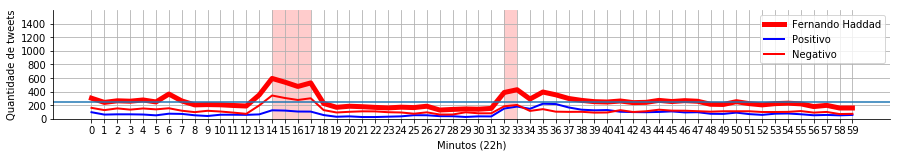

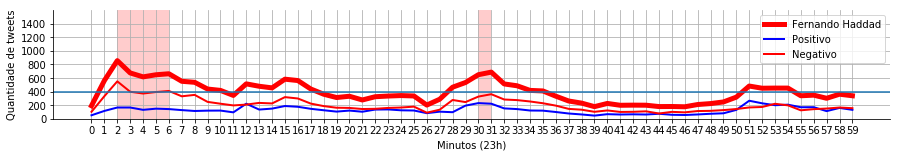

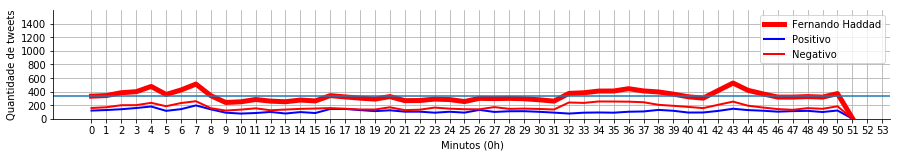

In [68]:
plot_distribuicao_sentimento(full_tweets, 'haddad', 1.5)

In [76]:
analise_nlp(full_tweets, 'haddad', 22, 14, 17)

 Hor√°rio:  22h14 as 22h17
 Presidenci√°vel:  Fernando Haddad
 Quantidade de tweets:  2137
 Verbos mais utilizados:  [('ter', 24), ('falar', 22), ('dar', 15), ('querer', 13), ('achar', 12)]
 Adjetivos mais utilizados:  [(haddad, 1), (haddad, 1), (vivo, 1), (segundo, 1), (#, 1)]


 Alguns tweets com o verbo "falar":

üí¨   meu deus o PT foi o governo + corporativista da hist√≥ria e o haddad acha que tem o direito de falar algo

üí¨   Haddad falando do governo do FHC 33203838299382 milh√µes de anos atr√°s. Eu quero saber do futuro, quero saber da pro‚Ä¶ https://t.co/tUzQ3CM0sJ

üí¨   Haddad falou muito bem. PSDB entre outros partidos ajudaram a acabar com o governo de Dilma e a economia brasileira.

üí¨   S√≥ eu acho que o Haddad tem pregui√ßa de falar?

üí¨   N√£o sei se o Haddad tava falando e olhando pro Alckmin ou pra c√¢mera #DebateNaGlobo


 Alguns tweets com o verbo "querer":

üí¨   Haddad falando do governo do FHC 33203838299382 milh√µes de anos atr√°s. Eu quero saber do fu

O candidato Fernando Haddad comentou sobre o governo do Ex-Presidente Fernando Henrique Cardoso afirmando neste governo a carga tribut√°ria aumentou e a d√≠vida p√∫blica dobrou, o candidato advers√°rio Geraldo Alckmin retrucou afirmando que o governo de Fernando Henrique Cardoso foi 14 anos atr√°s e n√£o teria qualquer reflexo no cen√°rio atual da economia brasileira. O coment√°rio do candidato Fernando Haddad foi recebido negativamente pelo p√∫blico do twitter.

In [77]:
analise_nlp(full_tweets, 'haddad', 22, 32, 34)

 Hor√°rio:  22h32 as 22h34
 Presidenci√°vel:  Fernando Haddad
 Quantidade de tweets:  1106
 Verbos mais utilizados:  [('ter', 11), ('fazer', 8), ('falar', 7), ('levar', 5), ('achar', 5)]
 Adjetivos mais utilizados:  [(juntos!\r\r\n\r\r\nBoulos, 1), (melhor, 1), (eleitoral, 1), (do, 1), (ok, 1)]


 Alguns tweets com o verbo "falar":

üí¨   Esse haddad t√° fazendo pergunta ou falando do bolsonaro lkkk

üí¨   #Haddad√â13 o coiso est√° na Record falando mal do @LulaOficial e do Haddad ! O coiso mentindo com a maior cara de pau ,dizendo que foi a esquerda que dezuniu o Brasil , comecem a colocar o v√≠deo desse FDP racista e homof√≥bico nas redes sociais !

üí¨   Coloquei na globo e t√° o Haddad mentindo e falando merda sobre o bolsonaro. KKKKKKKKKKKKKKKKKK NAO TO ACREDITANDO C‚Ä¶ https://t.co/mTcaRpfHNT

üí¨   Dobradinha entre BOULOS e Haddad n√£o deu mt certo. Mas BOULOS falou certo.

üí¨   Haddad insiste em falar mal do Temer que foi eleito junto com PT. Se toca cara.   #DebateNaGlob

Neste momento o candidato Fernando Haddad chamou o candidato Guilherme Boulos para responder a sua pergunta e o questionou sobre seus pensamentos quanto aos candidatos que est√£o apoiando o governo Temer e principalmente √†s propostas radicais do candidato Jair Bolsonaro.

In [78]:
analise_nlp(full_tweets, 'haddad', 23, 2, 6)

 Hor√°rio:  23h2 as 23h6
 Presidenci√°vel:  Fernando Haddad
 Quantidade de tweets:  3459
 Verbos mais utilizados:  [('querer', 40), ('ficar', 25), ('dar', 23), ('comer', 21), ('botar', 17)]
 Adjetivos mais utilizados:  [(dantesco, 1), (devido, 1), (nervoso, 1), (nervoso, 1), (https://t.co/sb5XYPUNMY, 1)]


 Alguns tweets com o verbo "querer":

üí¨   e o alvaro dias querendo fazer o haddad de correio elegante

üí¨   Haddad dando a bronca que a gente queria no √Ålvaro Dias. Obrigado √≠cone!

üí¨   @andreazzaeditor O que Haddad quer dizer quando fala ‚Äúvoc√™s destru√≠ram‚Äù falando da economia?

üí¨   "eu quero ficar bem de frente pro haddad" KKKKKKKKKKKKKKK mas gente  #DebateNaGlobo

üí¨   Vamos dar a Resposta para haddad. ele quer saber quem banca a campanha do Bolsonaro, #eutobancando , agora tb quero‚Ä¶ https://t.co/Roi1s7M3DY


 Alguns tweets com o verbo "ficar":

üí¨   MOLEQUE, concordei com o Haddad. Alvaro Dias √© um merd√£o, fica de palha√ßada, √© c√≠nico. POSTURA POHA

ü

Esta manifesta√ß√£o no twitter est√° atrelada ao momento em que o candidato Fernando Haddad ao responder a pergunta do candidato √Ålvaro Dias inicia com afirma√ß√µes sobre o seu comportamento no debate, chamando aten√ß√£o √†s diversas vezes em que o candidato √Ålvaro Dias recebeu recomenda√ß√µes do apresentador William Bonner para manter devidamente posicionado e aos ataques do candidato ao partido PT. O p√∫blico do twitter, em sua maioria, reagiu com tweets agressivos ao candidato √Ålvaro Dias.

In [79]:
analise_nlp(full_tweets, 'haddad', 23, 29, 32)

 Hor√°rio:  23h29 as 23h32
 Presidenci√°vel:  Fernando Haddad
 Quantidade de tweets:  2383
 Verbos mais utilizados:  [('comer', 34), ('dizer', 28), ('dar', 25), ('ter', 20), ('parecer', 19)]
 Adjetivos mais utilizados:  [(simples, 1), (maior, 1), (haddad, 1), (boa, 1), (pol√≠tico, 1)]


 Alguns tweets com o verbo "comer":

üí¨   meu deus haddad tem como por nem que seja UM MINUTO largar m√£o de ser advogado do LULA e fazer uma simples AUTOCRITICA!!!1!!!!!!

üí¨   marina comendo haddad aoviva√ßo

üí¨   Namore algu√©m que fale de vc como o Haddad fala do lula

üí¨   Marina comendo cu do Haddad ao vivo #DebateNaGlobo

üí¨   MARINA T√Å COMENDO O CU DO HADDAD ALI #DebateNaGlobo


 Alguns tweets com o verbo "parecer":

üí¨   meu deus o debate entre ciro boulos e haddad parece uma sauna

-concordo
-√© isso mesmo, vou apenas complementar
-muito bem dito

üí¨   haddad parece c√£o com raiva, n√£o gostei pr√≥ximo

üí¨   Alvaro Dias atacou o PT e a gest√£o de Fernando Haddad no MEC. Irrita

Esta manifesta√ß√£o em rela√ß√£o ao candidato Fernando Haddad √© reflexo da manifesta√ß√£o no mesmo intervalo de tempo em rela√ß√£o √† candidata Marina Silva, neste momento a candidata pediu ao candidato suas considera√ß√µes em rela√ß√£o ao seu partido estar envolvido na polariza√ß√£o pol√≠tica e o candidato a respondeu elogiando o mandato dos 3 √∫ltimos governos, todos pelo PT, ao terminar a candidata o acusa de n√£o reconhecer os erros cometidos no governo sob a legenda PT e continuar reiterando estes erros.

**Considera√ß√µes**<br>
Dos quatro pontos de manifesta√ß√µes encontrados na an√°lise dos tweets em rela√ß√£o ao candidato Fernando Haddad, tr√™s deles foram marcados por tweets agressivos, tanto em favor ao candidato, quanto contra. Nestes tr√™s pontos de manifesta√ß√µes o assunto central foi o seu partido e a repercuss√£o dos governos anteriores sob a legenda do partido e da polariza√ß√£o pol√≠tica atual.

### Geraldo Alckmin

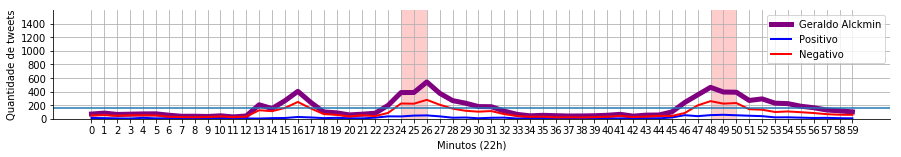

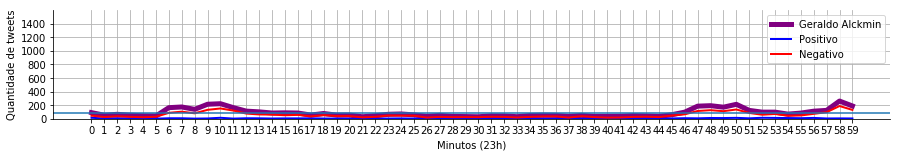

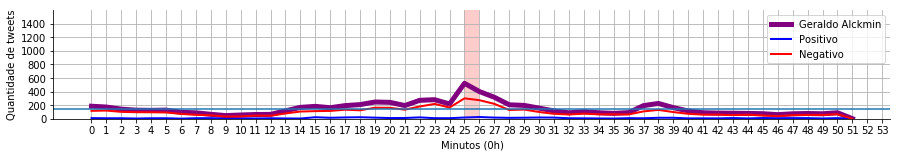

In [95]:
plot_distribuicao_sentimento(full_tweets, 'alckmin', 2.44)

In [96]:
analise_nlp(full_tweets, 'alckmin', 22, 24, 27)

 Hor√°rio:  22h24 as 22h27
 Presidenci√°vel:  Geraldo Alckmin
 Quantidade de tweets:  1691
 Verbos mais utilizados:  [('ter', 34), ('falar', 21), ('parecer', 19), ('falir', 16), ('querer', 14)]
 Adjetivos mais utilizados:  [(geraldo, 1), (igual, 1), (https://t.co/8I1LcDYYUd, 1), (necess√°ria, 1), (trabalhista, 1)]


 Alguns tweets com o verbo "falar":

üí¨   Alckmin falando que a reforma trabalhista foi "necess√°ria" e n√£o retira direitos dos trabalhadores.

meus parab√©ns‚Ä¶ https://t.co/qrTz71xlco

üí¨   a gente ouve alckmin falando e fica EM SITUA√á√ÉO DE AGREDIR UM IDOSO

üí¨   O Alckmin falando da TV do Lula
O Boulos falando de 50 tons de temer
O Ciro falando do Cear√°
O Meirelles pedindo pr‚Ä¶ https://t.co/CqX6szshj1

üí¨   Eu ouvindo o Alckmin falando no #DebateNaGlobo https://t.co/IsNpBf079e

üí¨   alckmin so falando bosta uma coisa q n e novidade ne mores


 Alguns tweets com o verbo "parecer":

üí¨   √â impress√£o minha ou parece que o Alckmin n√£o tem l√°bios? Lkkkkkk

Esta manifesta√ß√£o se deve ao discurso do candidato Geraldo Alckmin sobre a reforma trabalhista recentemente aprovada, o candidato afirma que a reforma n√£o retirou direitos dos trabalhadores. O p√∫blico do twitter reagiu negativamente a esta afirma√ß√£o.

In [97]:
analise_nlp(full_tweets, 'alckmin', 22, 48, 51)

 Hor√°rio:  22h48 as 22h51
 Presidenci√°vel:  Geraldo Alckmin
 Quantidade de tweets:  1518
 Verbos mais utilizados:  [('falar', 22), ('falir', 15), ('viver', 12), ('perder', 10), ('ter', 9)]
 Adjetivos mais utilizados:  [(trabalhistas, 1), (insalubres, 1), (ineg√°vel, 1), (melhor, 1), (pelo, 1)]


 Alguns tweets com o verbo "falar":

üí¨   Sinceramente, se eu t√¥ na plateia e o Alckmin come√ßa a falar que fez maravilhas em SP eu levanto, grito "AH, VAI SE‚Ä¶ https://t.co/O566auL8M7

üí¨   Alckmin tinha de falar de bolacha sem receio. Ele sai da merenda, mas a merenda n√£o sai dele.

#DebateNaGlobo

üí¨   Alckmin falando que vai abaixar imposto sem diminuir o tamanho do estado chega a ser engra√ßado! #DebateNaGlobo

üí¨   o cara acabou de falar de 280 bi em desonera√ß√£o e o alckmin CONTINUA FALANDO EM TIRAR IMPOSTO

üí¨   Alckmin falou bolacha e n√£o biscoito, to puto


 Alguns tweets com o verbo "falir":

üí¨   gente eu realmente n√£o acompanho o Alckmin mas pelo o que todo mund

O candidato Geraldo Alckmin discursou sobre a sua atua√ß√£o como governador do estado de S√£o Paulo, afirmando e citando as redu√ß√µes de impostos. O p√∫blico no twitter se manifestou negativamente √† essas afirma√ß√µes.

In [98]:
analise_nlp(full_tweets, 'alckmin', 0, 25, 27)

 Hor√°rio:  0h25 as 0h27
 Presidenci√°vel:  Geraldo Alckmin
 Quantidade de tweets:  1240
 Verbos mais utilizados:  [('falar', 29), ('ter', 16), ('entender', 12), ('falir', 10), ('achar', 10)]
 Adjetivos mais utilizados:  [(comum, 1), (primeira, 1), (#, 1), (maior, 1), (@sos_catie, 1)]


 Alguns tweets com o verbo "falar":

üí¨   Que bonito isso que  o Alckmin falou do filho que a m√£e ama mais poetisou

üí¨   @mizanzuk Juro que quando o Alckmin falou, "olha, √Ålvaro, n√≥s temos em comum..." eu pensei "a surra que demos nos professores".

üí¨   Alckmin, ladr√£o de merenda, falando que quer ser o presidente dos pequeninos 

A desfa√ßatez desses ARROMBADOS desconhece limites

üí¨   √≥bvio que alckmin nao chamou ciro boulos ou haddad por medo deles falarem das merenda

üí¨   O ALCKMIN VAI FALAR DO RIO S√ÉO FRANCISCO MESMO?

#tsunamiCiro
#DebateNaGlobo
#CiroNaGlobo https://t.co/hsQf2knv9i


 Alguns tweets com o verbo "entender":

üí¨   passo a maior parte do tempo das respostas do alc

Neste momento da manifesta√ß√£o o candidato Geraldo Alckmin recitou um conto para refor√ßar sua ideia de, segundo suas pr√≥prias palavras, "ser o presidente da primeira inf√¢ncia". O p√∫blico no twitter reagiu negativamente devido √†s acusa√ß√µes de corrup√ß√£o na merenda escolar em que o candidato √© alvo.

**Considera√ß√µes**<br>
Este candidato teve ao longo do debate, em sua maioria, tweets carregados de sentimentos negativos, a princ√≠pio este cen√°rio parece acontecer devido √†s acusa√ß√µes de corrup√ß√£o que este candidato sofreu enquanto era governador do estado de S√£o Paulo.

### Henrique Meirelles

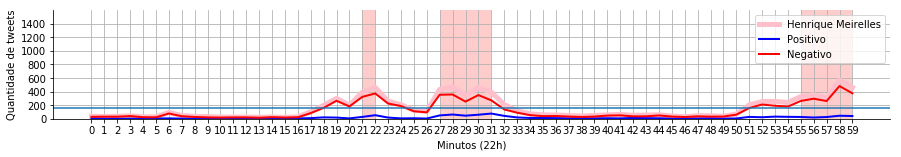

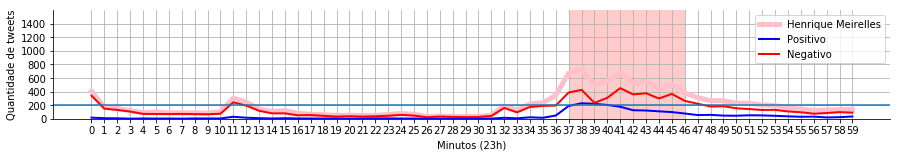

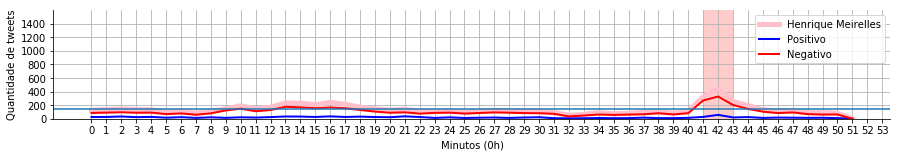

In [106]:
plot_distribuicao_sentimento(full_tweets, 'meirelles', 1.8)

In [107]:
analise_nlp(full_tweets, 'meirelles', 22, 21, 23)

 Hor√°rio:  22h21 as 22h23
 Presidenci√°vel:  Henrique Meirelles
 Quantidade de tweets:  1113
 Verbos mais utilizados:  [('chamar', 51), ('ter', 31), ('parecer', 22), ('saber', 11), ('rir', 11)]
 Adjetivos mais utilizados:  [(aaaaaaaa, 1), (https://t.co/cqstf1PcmD, 1), (3879, 1), (impag√°vel, 1), (boas, 1)]


 Alguns tweets com o verbo "chamar":

üí¨   pode chamar o meirelles que ele n√£o vai resolver problema nenhum kkkkkkk

üí¨   At√© o Meirelles acha esse slogan ‚ÄúChama o Meirelles‚Äù uma piada. Kkkkkk ele falou e segurou o riso kkkkkk #DebateGlobo

üí¨   √Ålvaro Dias gastou todo o tempo louvando a Globo e criticando o Lula e faltou tempo para o principal, a pergunta ao Meirelles. Em jornalismo, isso se chama "nariz de cera" #DebateNaGlobo

üí¨   Dois gag√°s. √Ålvaro Dias (Coringa) perdeu o tempo da pergunta.. Para seu colega. CHAMA o Meirelles kkk. Quem √© mais‚Ä¶ https://t.co/xHgrtmgDQH

üí¨   Eu n√£o aguento mais ouvir "chama o Meirelles" meu deus


 Alguns tweets com o ver

O candidato Henrique Meirelles iniciou seu discurso com o seu *slogan* de campanha "Chama o Meirelles". O p√∫blico no twitter pareceu reagir negativamente.

In [108]:
analise_nlp(full_tweets, 'meirelles', 22, 27, 31)

 Hor√°rio:  22h27 as 22h31
 Presidenci√°vel:  Henrique Meirelles
 Quantidade de tweets:  2094
 Verbos mais utilizados:  [('tava', 53), ('parecer', 34), ('cair', 30), ('ter', 28), ('chamar', 28)]
 Adjetivos mais utilizados:  [(segundo, 1), (c√¥mico, 1), (igual, 1), (pro, 1), (presidenci√°vel, 1)]


 Alguns tweets com o verbo "tava":

üí¨   o meirelles certeza q tava em um dos barco q veio de portugual colonizar o brasil

üí¨   o meirelles certeza q tava em um dos barco q veio de portugual colonizar o brasil

üí¨   o meirelles certeza q tava em um dos barco q veio de portugual colonizar o brasil

üí¨   o meirelles certeza q tava em um dos barco q veio de portugual colonizar o brasil

üí¨   o meirelles certeza q tava em um dos barco q veio de portugual colonizar o brasil


 Alguns tweets com o verbo "parecer":

üí¨   Parece q o meirelles vai ter um ataque do cora√ß√£o

üí¨   Esse Meirelles parece algu√©m da familia addams

üí¨   Meirelles e √Ålvaro Dias parece aquele papo de dois 

Neste momento o microfone do candidato Henrique Meirelles caiu. Houve manifesta√ß√µes negativas ao candidato.

In [109]:
analise_nlp(full_tweets, 'meirelles', 22, 55, 59)

 Hor√°rio:  22h55 as 22h59
 Presidenci√°vel:  Henrique Meirelles
 Quantidade de tweets:  2022
 Verbos mais utilizados:  [('ter', 52), ('parecer', 31), ('falir', 30), ('fazer', 27), ('dar', 21)]
 Adjetivos mais utilizados:  [(vcs, 1), (longas, 1), (#, 1), (legal, 1), (engra√ßado, 1)]


 Alguns tweets com o verbo "parecer":

üí¨   o meirelles e o alvaro parece que acabaram de sair da endoscopia

üí¨   essa dobradinha henrique meirelles alvaro dias ta parecendo aqueles aluno da escolinha do professor raimunfo que nao consegue segurar o riso

üí¨   gente alguem tira o meirelles meu deus parece uma lesma falando coitado

üí¨   Meirelles X √Ålvaro Dias faz Americano X ibis parecer aceit√°vel

üí¨   essa dobradinha henrique meirelles alvaro dias ta parecendo aqueles aluno da escolinha do professor raimunfo que nao consegue segurar o riso


 Alguns tweets com o verbo "falir":

üí¨   Meirelles fala devagar pra enrolar ou porque n√£o tem f√¥lego?

üí¨   alvaro dias e meirelles os dois a 8

As manifesta√ß√µes s√£o devido ao momento em que o debate se d√° entre o candidato Henrique Meirelles e o candidato √Ålvaro Dias e, em sua maioria, est√£o relacionados √† postura do candidato.

In [110]:
analise_nlp(full_tweets, 'meirelles', 23, 37, 46)

 Hor√°rio:  23h37 as 23h46
 Presidenci√°vel:  Henrique Meirelles
 Quantidade de tweets:  5535
 Verbos mais utilizados:  [('chamar', 112), ('falar', 98), ('dizer', 97), ('fazer', 89), ('parecer', 67)]
 Adjetivos mais utilizados:  [(estranho, 1), (da, 1), (pol√≠tica, 1), (brasileira, 1), (meirelles, 1)]


 Alguns tweets com o verbo "chamar":

üí¨   ‚ÄúN√£o vou chamar Meirelles, vou tachar Meirelles‚Äù #DebateNaGlobo https://t.co/V5OtbHyxNj

üí¨   E QUANDO FICA CONFUSO FAZ O BORD√ÉO: CHAMA U MEIRELLES OU 10 MILH√ïES DE EMPREGOS

üí¨   N√£o √© CHAMA O MEIRELLES, e sim SEGURA O MEIRELLES!
Ele t√° quase caindooo

üí¨   Meirelles chamando o boulos de vagabundo!! Sensacional hahahaha

üí¨   Meirelles deu um show em cima de Boulos, a ponto de Ciro Gomes cham√°-lo para perguntar.


 Alguns tweets com o verbo "falar":

üí¨   o ciro e o meirelles se juntaram pra falar mal do bolsonaro KKKKKKKKKKKKKK mds, esses vov√¥s #DebateGlobo

üí¨   MANO EU N AGUENTO O MEIRELLES FALANDO AAAAAAAA

üí¨  

A manifesta√ß√£o se deu no momento em que o debate estava entre o candidato Henrique Meirelles e o candidato Guilherme Boulos, onde o candidato Henrique Meirelles insinua que o candidato Guilherme Boulos n√£o trabalha.

In [111]:
analise_nlp(full_tweets, 'meirelles', 0, 41, 44)

 Hor√°rio:  0h41 as 0h44
 Presidenci√°vel:  Henrique Meirelles
 Quantidade de tweets:  1217
 Verbos mais utilizados:  [('chamar', 59), ('ter', 30), ('gritar', 19), ('dizer', 14), ('bolsar', 11)]
 Adjetivos mais utilizados:  [(√∫ltimo, 1), (juntos, 1), (mano, 1), (domin√≥, 1), (√öltimo, 1)]


 Alguns tweets com o verbo "chamar":

üí¨   Tem que algu√©m chamar o Bolso e:

- entra aqui nessa sala
- tem o que a√≠?
- entra rapid√£o pra eu te mostrar um neg√≥cio

Ele entra e t√° l√° o Haddad, Ciro, Marina, Alckmin, Meirelles

Aparece o Bonner

- Voc√™ est√° no debate da Globo

Close no rosto do candidato. Uma l√°grima escorre

üí¨   Qu√£o triste deve ser sua vida pra vibrar gritando "chama o Meirelles" na Globo

üí¨   SENHORES, PELA √öLTIMA VEZ OUVIMOS "CHAMA O MEIRELLES" O, GLORIA. #DebateNaGlobo

üí¨   √öltimo debate. Meirelles nunca mais ser√° chamado. #RIP

üí¨   chamar ou taxar o meirelles eis a quest√£o


 Alguns tweets com o verbo "gritar":

üí¨   Qu√£o triste deve ser sua vida p

O candidato Henrique Meirelles finaliza sua mensagem final ao eleitor com o seu famoso *slogan* de campanha "Chame o Meirelles".